**EJERCICIO DE REGRESIÓN LOGÍSTICA**

In [287]:
# Cargamos a nuestro entorno de trabajo las librerías necesarias.

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

In [288]:
# Cargamos la información del CSV en una variable llamada data
data = pd.read_csv("C:/Users/afeli/Documents/UNAD/UNAD/2023-II/Analisis de Datos/Etapa 2/archive logistica/framingham.csv", sep=",")

In [382]:
# Ejecutamos la variable data para mostrar la información cargada
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Tomamos las variables de interés que queremos estudiar, por lo que elegimos glucosa y diabetes, puesto que para determinar las personas que tienen diabetes se miden los niveles de glucosa en la sangre, por lo tanto estas variables son las más óptimas para el estudio**

In [383]:
# Seleccionamos del dataset las variables de estudio
data[['glucose','diabetes']].head(5)

,glucose,diabetes
0,77.0,0
1,76.0,0
2,70.0,0
3,103.0,0
4,85.0,0


In [384]:
# Creamos el Dataframe para el eje "x" con los datos de glucosa
x = data[['glucose']]

# Mostramos los primeros 5 registros del DataFrame con los datos de glucosa
x.head(5)

,glucose
0,77.0
1,76.0
2,70.0
3,103.0
4,85.0


In [385]:
# Creamos el Dataframe para el eje "y" con los datos de diabetes
y = data['diabetes']

# Mostramos los primeros 5 registros del Dataframe con los datos de diabetes
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

**Para poder crear el modelo de regresión logística debemos eliminar los campos nulos (NaN) que existan en el DataFrame de glucosa, sino NO será posible crear el modelo de regresión logística, además como eliminamos filas que estaban vacías debemos hacer coincidir los índices de "x" con "y"**

In [387]:
# Eliminamos los datos de tipo NaN que contiene el Dataframe de glucosa
x = x.dropna()

# Alineamos los indices de "y" con "x"
y = y.loc[x.index] 

In [388]:
# Creamos el modelo de Regresión Logística
regresion = LogisticRegression()
regresion.fit(x, y)

LogisticRegression()

**Determinamos los valores para las variables w y b, que corresponden a los coeficientes y la intersepción en la fórmula de Regresión Logística (y = 1 / (1 + exp(-(wx + b)))wx + b)**

In [396]:
# Determinanos el valor del coeficiente (w).
w = regresion.coef_[0][0]
#w = 0.09
print( "Coeficiente (w):",w)

# Determinamos el valor de la intercepción (b)
b = regresion.intercept_[0]
#b = -3.5
print( "Intersepción (b):",b)

Pendiente (w): 0.0847325790030568
Intersección (b): -11.899187741469357


**Creamos el grafico de la Regresión Logística creada**

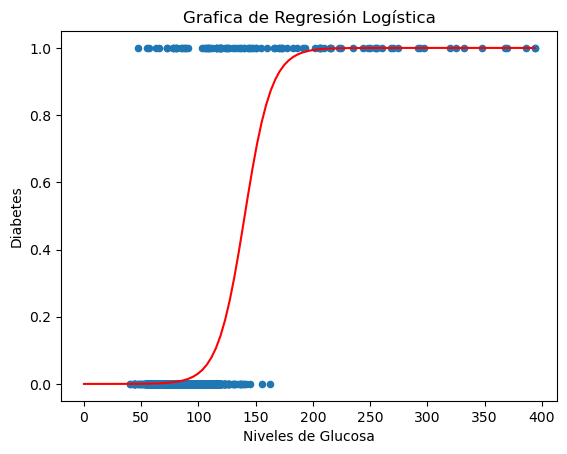

In [421]:
# Graficamos la curva de regresión logística

# Puntos de la recta con base los valor de glucosa y lo definimos en un rango de 0 a 100, segun el maximo de datos de la columna glucosa
x = np.linspace(0,data['glucose'].max(),100)

# Aplicamos la formula de Regresión Logística, reemplazando con los valores previamente hallados
y = 1 / (1 + np.exp(-(w * x + b)))

# Gráfica de la curva de Regresión Logística
data.plot.scatter(x='glucose', y='diabetes')
plt.plot(x, y, color="red")

# Etiquetas del gráfico en general
plt.title("Grafica de Regresión Logística")
plt.xlabel("Niveles de Glucosa")
plt.ylabel("Diabetes")

# Mostramos el gráfico creado para Regresión Logística
plt.show()

**Conclusiones**

1. Los coeficientes del modelo de regresión logística que corresponde al nivel de glucosa tienen un impacto significativo en la probabilidad de tener diabetes. 

2. Respecto a la gráfica podemos observar que si el nivel de glucosa es negativo el riesgo de padecer diabetes es menor, por el contrario si el nivel de glucosa es positivo el riesgo de padecer diabetes será mayor.

3. Observando la gráfica podemos deducir que la probabilidad de que una persona padezca de diabetes, comienza a aumentar cuanto los niveles de glucosa están aproximadamente sobre 140 en adelante, pues en este punto la probabilidad es de 0.49.
